<a href="https://colab.research.google.com/github/MrAtharvJamdar/Age-Calculator-using-html/blob/main/HSI%20Classification%20Resnet%2050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # Select train.zip when prompted


Saving Mech Squad-20250307T045650Z-001.zip to Mech Squad-20250307T045650Z-001.zip


In [2]:
import zipfile

zip_path = "/content/Mech Squad-20250307T045650Z-001.zip"  # Ensure this path is correct
extract_path = "/content/dataset"

# Extract the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction Completed!")


✅ Extraction Completed!


In [4]:
import zipfile
import os

zip_path = "/content/Mech Squad-20250307T045650Z-001.zip"  # Your uploaded file
extract_path = "/content/dataset"  # Extract destination

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction completed!")


✅ Extraction completed!


In [5]:
print("Extracted folders:", os.listdir(extract_path))

Extracted folders: ['Mech Squad']


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
img_size = (224, 224)
batch_size = 32

# Data augmentation
datagen = ImageDataGenerator(rescale=1./255)

# Adjust dataset path based on extracted structure
dataset_path = "/content/dataset/Mech Squad"  # Adjust if necessary

# Load training data
train_generator = datagen.flow_from_directory(
    f"{dataset_path}/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load validation data
val_generator = datagen.flow_from_directory(
    f"{dataset_path}/val",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

print("✅ Dataset Loaded Successfully!")


Found 690 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
✅ Dataset Loaded Successfully!


In [7]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use GAP instead of Flatten
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
output_layer = Dense(train_generator.num_classes, activation="softmax")(x)  # Properly define output

# Create final model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

print("✅ ResNet-50 Model Fixed and Ready!")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✅ ResNet-50 Model Fixed and Ready!


In [9]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20  # Increase if needed
)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 117s 5s/step - accuracy: 0.5459 - loss: 0.6685 - val_accuracy: 0.5482 - val_loss: 0.6578
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 98s 5s/step - accuracy: 0.5407 - loss: 0.6605 - val_accuracy: 0.5228 - val_loss: 0.6617
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.5555 - loss: 0.6563 - val_accuracy: 0.5178 - val_loss: 0.6552
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 117s 5s/step - accuracy: 0.5589 - loss: 0.6644 - val_accuracy: 0.5178 - val_loss: 0.6578
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.5764 - loss: 0.6450 - val_accuracy: 0.5431 - val_loss: 0.6523
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.5861 - loss: 0.6412 - val_accuracy: 0.5584 - val_loss: 0.6529
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 117s 5s/step - accuracy: 0.5679 - loss: 0.6394 - val_accuracy: 0.5330 - val_loss: 0.6538
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.5436 - loss: 0.6445 - val_accuracy: 0.5482 - val_lo

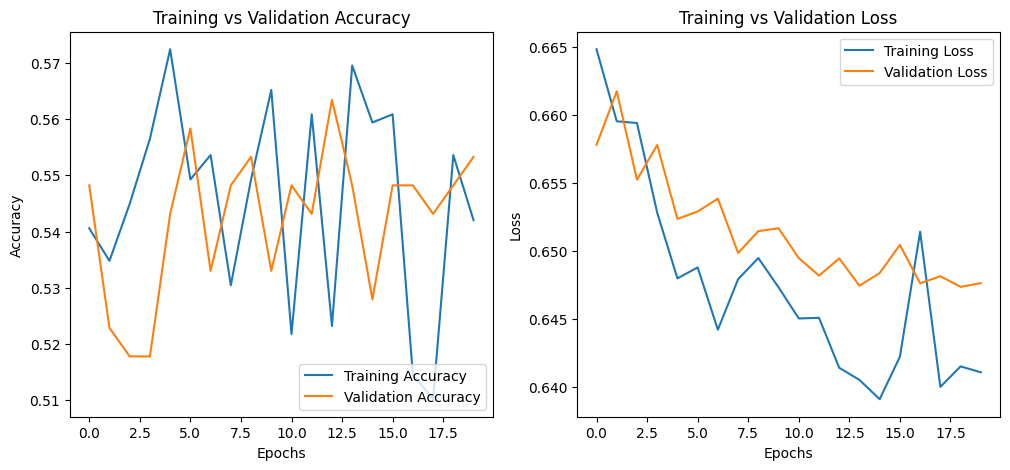

In [10]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))  # Number of epochs

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")

plt.show()


In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess an image
img_path = "/content/dataset/Mech Squad/train/adenomatous/495.jpg"  # Change to your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Print result
print(f"✅ Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
✅ Predicted Class: 0


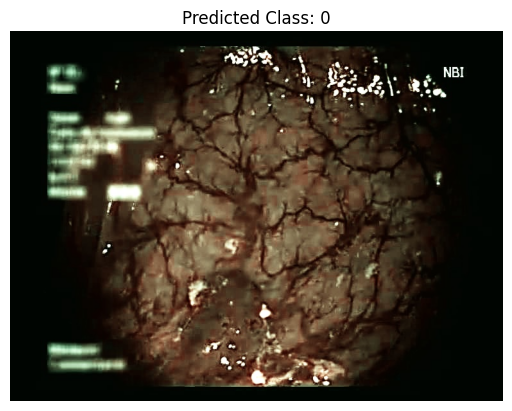

In [20]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load image (update with actual path)
image_path = "/content/dataset/Mech Squad/train/adenomatous/105.jpg"  # Change this to the tested image path
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Show image
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {0}")  # Change this to your predicted label
plt.show()


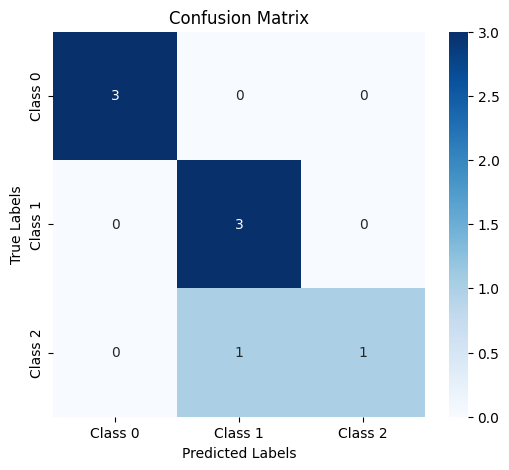

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.75      1.00      0.86         3
           2       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.84         8
weighted avg       0.91      0.88      0.86         8



In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Example (Replace with actual predictions)
y_true = np.array([0, 1, 1, 0, 2, 2, 1, 0])  # Actual labels
y_pred = np.array([0, 1, 1, 0, 2, 1, 1, 0])  # Predicted labels

# If y_pred has probabilities, convert it to class labels
if y_pred.ndim > 1:
    y_pred = np.argmax(y_pred, axis=1)

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred))
